# Comparing Model Performance with a Simple Baseline

Here, I compare the generalization performance of a model to a minimal baseline.

In [1]:
from sklearn.datasets import fetch_california_housing


data, target = fetch_california_housing(return_X_y=True, as_frame=True)
target *= 100 # rescaling the target

In [2]:
# Shuffle splotu cross_val with 20% of the data for validation
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=30,
                 test_size=0.2,
                 random_state=123
                 )


In [4]:
# Running a Decision Tee Regressor
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate


# Instantiate the DT regressor
tree_reg = DecisionTreeRegressor()


tree_reg_cv_results = cross_validate(
    tree_reg,
    data,
    target,
    cv=cv, 
    scoring='neg_mean_absolute_error',
    n_jobs=2
)


tree_reg_error = (
    pd.Series(
        -tree_reg_cv_results['test_score'],
        name='Decision Tree Regressor'
    )
)

tree_reg_error.describe()

count    30.000000
mean     46.173879
std       1.202844
min      43.733206
25%      45.560079
50%      46.131511
75%      46.840594
max      48.310412
Name: Decision Tree Regressor, dtype: float64

In [11]:
# Evaluating the Dummy Regressor
from sklearn.dummy import DummyRegressor

# Perform prediction with the median value
dummy_reg = DummyRegressor(strategy='median')


dummy_reg_cv_results = cross_validate(
    dummy_reg,
    data,
    target,
    cv=cv,
    scoring='neg_mean_absolute_error',
    n_jobs=2
)


dummy_reg_error = (
    pd.Series(
        -dummy_reg_cv_results['test_score'],
        name='Dummy Regressor'
    )
)


dummy_reg_error.describe()

count    30.000000
mean     87.978725
std       0.875053
min      86.367630
25%      87.410953
50%      87.840285
75%      88.511958
max      90.371273
Name: Dummy Regressor, dtype: float64

In [12]:
# Plotting the errors
all_errors = pd.concat(
    [tree_reg_error, dummy_reg_error],
    axis=1
)


all_errors

,Decision Tree Regressor,Dummy Regressor
0,46.154529,88.097190
1,48.310412,87.976597
2,47.462007,88.212765
3,45.369109,90.371273
4,48.032863,87.687668
5,46.452389,87.271920
6,46.901155,88.540306
7,47.924433,88.317459
8,47.172379,87.379646
9,45.890083,88.426913


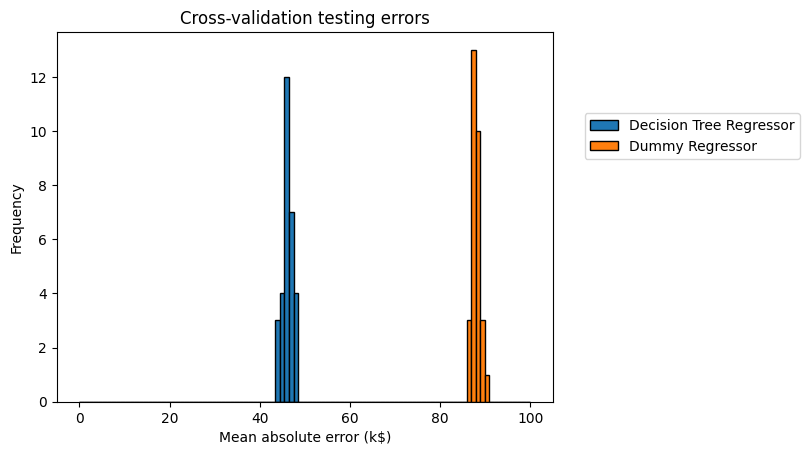

In [13]:
import matplotlib.pyplot as plt
import numpy as np


bins = np.linspace(start=0, stop=100, num=100)
all_errors.plot.hist(bins=bins, edgecolor='black')
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Mean absolute error (k$)")
_ = plt.title("Cross-validation testing errors")

We see that the generalization performance of our decision tree is far from
being perfect: the price predictions are off by more than 45,000 US dollars on
average. However, it is much better than the `median` price baseline. So this
confirms that it is possible to predict the housing price much better by using
a model that takes into account the values of the input features (housing
location, size, neighborhood income...). Such a model makes more informed
predictions and approximately divides the error rate by a factor of 2 compared
to the baseline that ignores the input features.

Note that here we used the mean price as the baseline prediction. We could
have used the `mean` instead. See the online documentation of the
[sklearn.dummy.DummyRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html)
class for other options. For this particular example, using the mean instead
of the mean does not make much of a difference, but this could have been the
case for datasets with extreme outliers.

## Worked Example 2

In [14]:
# Classification
df_url = 'https://raw.githubusercontent.com/INRIA/scikit-learn-mooc/main/datasets/adult-census-numeric-all.csv'


df = pd.read_csv(df_url)

data, target = df.drop(columns='class'), df['class']

In [21]:
# Cross val
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


cv = ShuffleSplit(n_splits=10,
                  test_size=0.5,
                  random_state=123
                 )


# Creating a Machine Learning to standardize data and log_reg classfier
log_reg_pipeline = make_pipeline(
    # Standard Scaler
    StandardScaler(),
    # Logistic Regression Model
    LogisticRegression()
)


log_reg_pipe_cv_results = cross_validate(
    log_reg_pipeline,
    data,
    target,
    cv=cv,
    scoring='accuracy',
    n_jobs=2
)


# Get the results
log_reg_acc = (
    pd.Series(
        log_reg_pipe_cv_results['test_score'],
        name='Logistic Regressor Test Score'
    )
)

# Logistic Regression Accuracy
log_reg_acc.describe()

count    10.000000
mean      0.813026
std       0.001644
min       0.809877
25%       0.812549
50%       0.813112
75%       0.813378
max       0.816592
Name: Logistic Regressor Test Score, dtype: float64

In [22]:
from sklearn.dummy import DummyClassifier

# Dummy Classifier instantiation
dummy_class = DummyClassifier(strategy='most_frequent')

dummy_reg_class = cross_validate(
    dummy_class,
    data,
    target,
    cv=cv,
    scoring='accuracy',
    n_jobs=2
)


# Get the results
dummy_reg_class_acc = (
    pd.Series(
        dummy_reg_class['test_score'],
        name='Dummy Regressor Test Score'
    )
)

# Logistic Regression Accuracy
dummy_reg_class_acc.describe()

count    10.000000
mean      0.760608
std       0.001548
min       0.758405
25%       0.759623
50%       0.760554
75%       0.761701
max       0.762786
Name: Dummy Regressor Test Score, dtype: float64

In [30]:
all_errors_df = pd.concat([
        dummy_reg_class_acc,
        log_reg_acc
    ], axis=1)

all_errors_df

,Dummy Regressor Test Score,Logistic Regressor Test Score
0,0.762786,0.813480
1,0.758691,0.813112
2,0.762663,0.816592
3,0.761885,0.813398
4,0.761148,0.813316
5,0.758405,0.812088
6,0.761025,0.812825
7,0.759838,0.809877
8,0.760084,0.813112
9,0.759551,0.812456


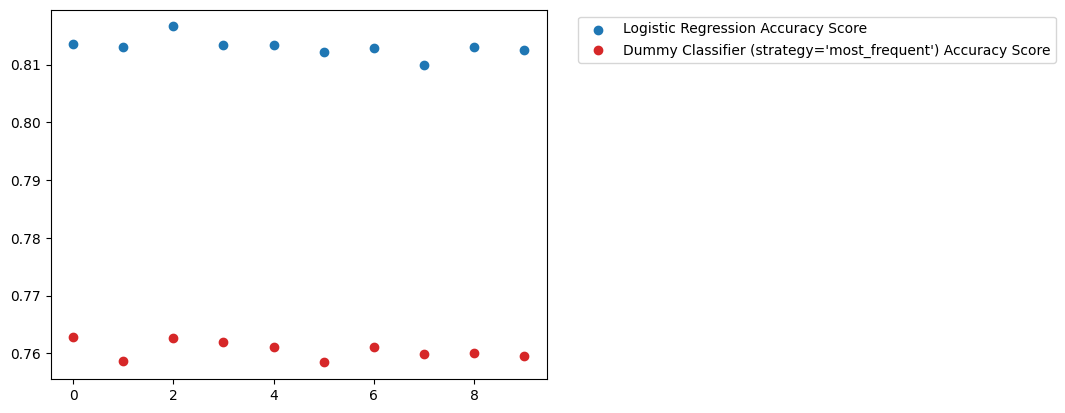

In [33]:

plt.scatter(
    log_reg_acc.index, 
    log_reg_acc, 
    color="tab:blue", 
    label="Logistic Regression Accuracy Score"
)


plt.scatter(
    dummy_reg_class_acc.index,
    dummy_reg_class_acc,
    color="tab:red",
    label="Dummy Classifier (strategy='most_frequent') Accuracy Score",
);


_ = plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

# Choice of Classification

## KFold

In [38]:
# from sklearn.datasets import load_iris
data, target = load_iris(as_frame=True, return_X_y=True)

In [39]:
from sklearn.model_selection import KFold

cv =  KFold(n_splits=3)

# Model Pipeline
log_reg_pipe = make_pipeline(
    # Standardize the values
    StandardScaler(),
    # Logistic Regression
    LogisticRegression()
)


log_reg_cv_results = cross_validate(
    log_reg_pipe,
    data, 
    target,
    cv=cv
)


test_score = log_reg_cv_results['test_score']

print(
    f"The average accuracy is {test_score.mean():.3f} ± {test_score.std():.3f}"
)

The average accuracy is 0.000 ± 0.000


The model above can not correctly classify any sample in any cross-validation split. Lets find out the issue.

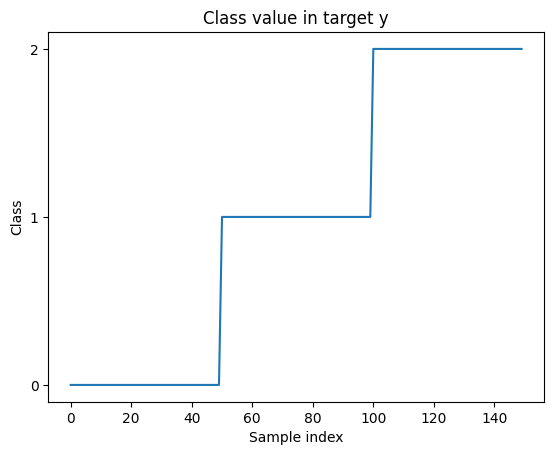

In [41]:
import matplotlib.pyplot as plt

target.plot()
plt.xlabel("Sample index")
plt.ylabel("Class")
plt.yticks(target.unique())
_ = plt.title("Class value in target y")

We see that the target vector `target` is ordered. It will have some
unexpected consequences when using the `KFold` cross-validation. To illustrate
the consequences, we will show the class count in each fold of the
cross-validation in the train and test set.

Let's compute the class counts for both the training and testing sets using
the `KFold` cross-validation, and plot these information in a bar plot.

We will iterate given the number of split and check how many samples of each
are present in the training and testing set. We will store the information
into two distincts lists; one for the training set and one for the testing
set.

In [42]:
n_splits = 3
cv = KFold(n_splits=n_splits)

train_cv_counts = []
test_cv_counts = []
for fold_idx, (train_idx, test_idx) in enumerate(cv.split(data, target)):
    target_train, target_test = target.iloc[train_idx], target.iloc[test_idx]

    train_cv_counts.append(target_train.value_counts())
    test_cv_counts.append(target_test.value_counts())

In [43]:
train_cv_counts = pd.concat(
    train_cv_counts, axis=1, keys=[f"Fold #{idx}" for idx in range(n_splits)]
)
train_cv_counts.index.name = "Class label"
train_cv_counts

,Fold #0,Fold #1,Fold #2
Class label,,,
1,50.0,NaN,50.0
2,50.0,50.0,NaN
0,NaN,50.0,50.0


In [44]:
test_cv_counts = pd.concat(
    test_cv_counts, axis=1, keys=[f"Fold #{idx}" for idx in range(n_splits)]
)
test_cv_counts.index.name = "Class label"
test_cv_counts

,Fold #0,Fold #1,Fold #2
Class label,,,
0,50.0,NaN,NaN
1,NaN,50.0,NaN
2,NaN,NaN,50.0


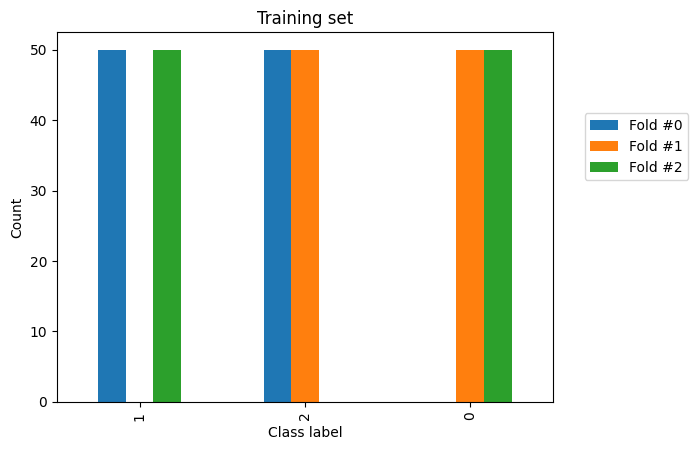

In [45]:
train_cv_counts.plot.bar()
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.ylabel("Count")
_ = plt.title("Training set")

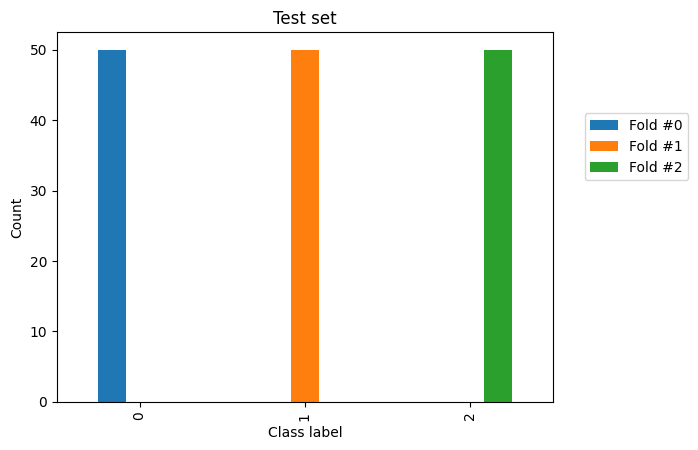

In [46]:
test_cv_counts.plot.bar()
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.ylabel("Count")
_ = plt.title("Test set")

We can confirm that in each fold, only two of the three classes are present in
the training set and all samples of the remaining class is used as a test set.
So our model is unable to predict this class that was unseen during the
training stage.

One possibility to solve the issue is to shuffle the data before splitting the
data into three groups.

In [47]:
# Shuffling the data
cv =  KFold(n_splits=3, shuffle=True)


log_reg_cv_results = cross_validate(
    log_reg_pipe,
    data, 
    target,
    cv=cv
)


test_score = log_reg_cv_results['test_score']

print(
    f"The average accuracy is {test_score.mean():.3f} ± {test_score.std():.3f}"
)

The average accuracy is 0.947 ± 0.025


We get results that are closer to what we would expect with an accuracy above
90%. Now that we solved our first issue, it would be interesting to check if
the class frequency in the training and testing set is equal to our original
set's class frequency. It would ensure that we are training and testing our
model with a class distribution that we will encounter in production.

In [48]:
train_cv_counts = []
test_cv_counts = []
for fold_idx, (train_idx, test_idx) in enumerate(cv.split(data, target)):
    target_train, target_test = target.iloc[train_idx], target.iloc[test_idx]

    train_cv_counts.append(target_train.value_counts())
    test_cv_counts.append(target_test.value_counts())
train_cv_counts = pd.concat(
    train_cv_counts, axis=1, keys=[f"Fold #{idx}" for idx in range(n_splits)]
)
test_cv_counts = pd.concat(
    test_cv_counts, axis=1, keys=[f"Fold #{idx}" for idx in range(n_splits)]
)
train_cv_counts.index.name = "Class label"
test_cv_counts.index.name = "Class label"

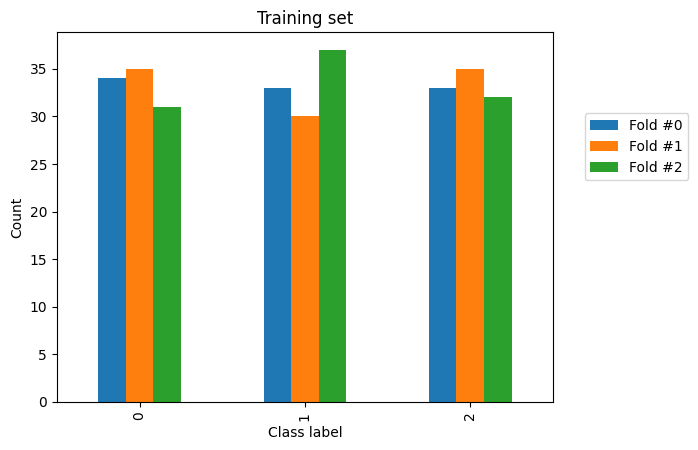

In [49]:
train_cv_counts.plot.bar()
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.ylabel("Count")
_ = plt.title("Training set")

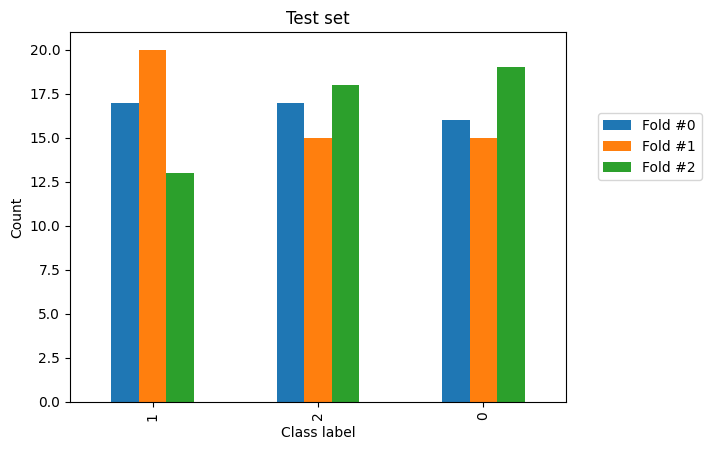

In [50]:
test_cv_counts.plot.bar()
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.ylabel("Count")
_ = plt.title("Test set")

We see that neither the training and testing sets have the same class
frequencies as our original dataset because the count for each class is
varying a little.

However, one might want to split our data by preserving the original class
frequencies: we want to **stratify** our data by class. In scikit-learn, some
cross-validation strategies implement the stratification; they contain
`Stratified` in their names.

In [51]:
from sklearn.model_selection import StratifiedKFold


# Shuffling the data
cv =  StratifiedKFold(n_splits=3)


log_reg_cv_results = cross_validate(
    log_reg_pipe,
    data, 
    target,
    cv=cv
)


test_score = log_reg_cv_results['test_score']

print(
    f"The average accuracy is {test_score.mean():.3f} ± {test_score.std():.3f}"
)

The average accuracy is 0.960 ± 0.016


In [52]:
train_cv_counts = []
test_cv_counts = []
for fold_idx, (train_idx, test_idx) in enumerate(cv.split(data, target)):
    target_train, target_test = target.iloc[train_idx], target.iloc[test_idx]

    train_cv_counts.append(target_train.value_counts())
    test_cv_counts.append(target_test.value_counts())
train_cv_counts = pd.concat(
    train_cv_counts, axis=1, keys=[f"Fold #{idx}" for idx in range(n_splits)]
)
test_cv_counts = pd.concat(
    test_cv_counts, axis=1, keys=[f"Fold #{idx}" for idx in range(n_splits)]
)
train_cv_counts.index.name = "Class label"
test_cv_counts.index.name = "Class label"

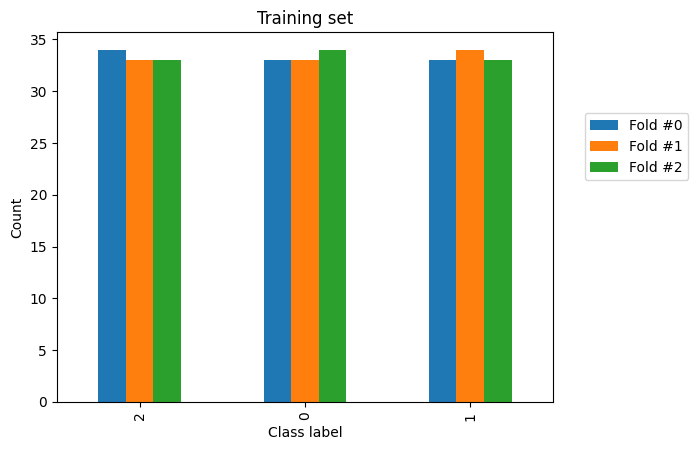

In [53]:
train_cv_counts.plot.bar()
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.ylabel("Count")
_ = plt.title("Training set")

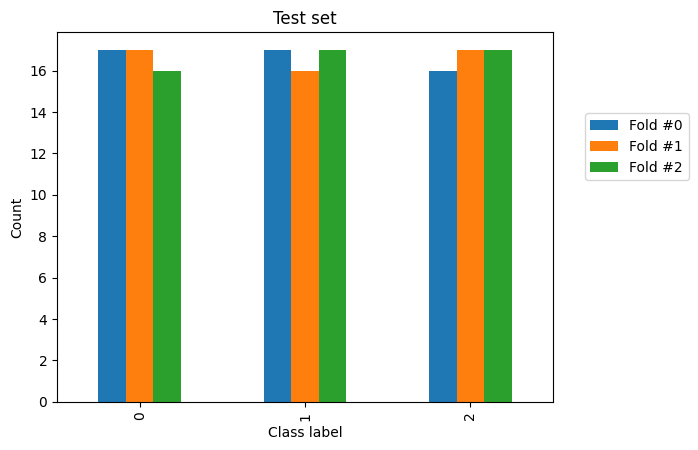

In [54]:
test_cv_counts.plot.bar()
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.ylabel("Count")
_ = plt.title("Test set")

In this case, we observe that the class counts are very close both in the
train set and the test set. The difference is due to the small number of
samples in the iris dataset.

In conclusion, this is a good practice to use stratification within the
cross-validation framework when dealing with a classification problem.

## Grouping 

In [55]:
from sklearn.datasets import load_digits

digits = load_digits()

data, target = digits.data, digits.target

In [58]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score


model = make_pipeline(
    MinMaxScaler(), 
    LogisticRegression(max_iter=1_000))


cv = KFold(shuffle=False)

test_score_no_shuffling = cross_val_score(
    model, 
    data, 
    target, 
    cv=cv, 
    n_jobs=2)



print(
    "The average accuracy is "
    f"{test_score_no_shuffling.mean():.3f} ± "
    f"{test_score_no_shuffling.std():.3f}"
)

The average accuracy is 0.931 ± 0.026


In [59]:
# Repeating with Shuffling

cv = KFold(shuffle=True)
test_score_with_shuffling = cross_val_score(
    model, 
    data, 
    target, 
    cv=cv, 
    n_jobs=2
)


print(
    "The average accuracy is "
    f"{test_score_with_shuffling.mean():.3f} ± "
    f"{test_score_with_shuffling.std():.3f}"
)

The average accuracy is 0.966 ± 0.013


From the above, Shuffling improves the accuracy.

In [60]:
all_scores = pd.DataFrame(
    [test_score_no_shuffling, test_score_with_shuffling],
    index=["KFold without shuffling", "KFold with shuffling"],
).T

all_scores

,KFold without shuffling,KFold with shuffling
0,0.941667,0.977778
1,0.897222,0.941667
2,0.949861,0.977716
3,0.963788,0.969359
4,0.902507,0.961003


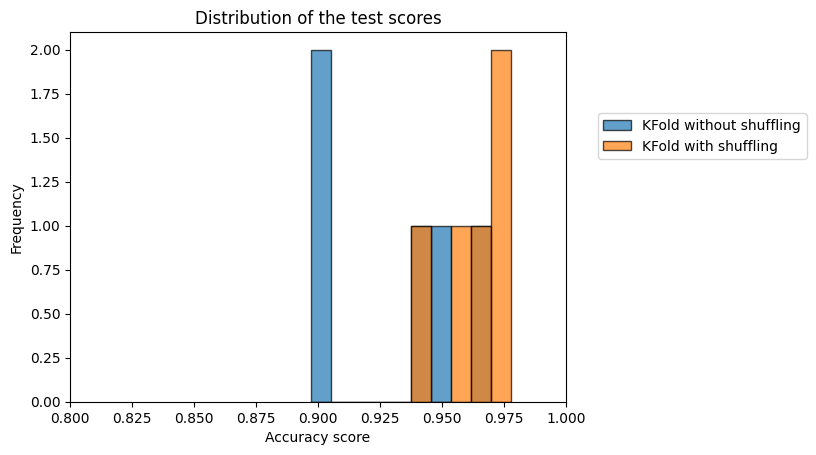

In [61]:
all_scores.plot.hist(bins=10, edgecolor="black", alpha=0.7)
plt.xlim([0.8, 1.0])
plt.xlabel("Accuracy score")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
_ = plt.title("Distribution of the test scores")

The cross-validation testing error that uses the shuffling has less variance
than the one that does not impose any shuffling. It means that some specific
fold leads to a low score in this case.

In [63]:
# Reading the DESCR

print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

If we read carefully, 13 writers wrote the digits of our dataset, accounting
for a total amount of 1797 samples. Thus, a writer wrote several times the
same numbers. Let's suppose that the writer samples are grouped. Subsequently,
not shuffling the data will keep all writer samples together either in the
training or the testing sets. Mixing the data will break this structure, and
therefore digits written by the same writer will be available in both the
training and testing sets.

Besides, a writer will usually tend to write digits in the same manner. Thus,
our model will learn to identify a writer's pattern for each digit instead of
recognizing the digit itself.

We can solve this problem by ensuring that the data associated with a writer
should either belong to the training or the testing set. Thus, we want to
group samples for each writer.

Indeed, we can recover the groups by looking at the target variable.

In [64]:
target[:200]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7,
       7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6,
       6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4,
       6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5,
       4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 9, 8, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3,
       4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3,
       5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6,
       4, 9])


It might not be obvious at first, but there is a structure in the target:
there is a repetitive pattern that always starts by some series of ordered
digits from 0 to 9 followed by random digits at a certain point. If we look in
detail, we see that there are 14 such patterns, always with around 130 samples
each.

Even if it is not exactly corresponding to the 13 writers in the documentation
(maybe one writer wrote two series of digits), we can make the hypothesis that
each of these patterns corresponds to a different writer and thus a different
group.

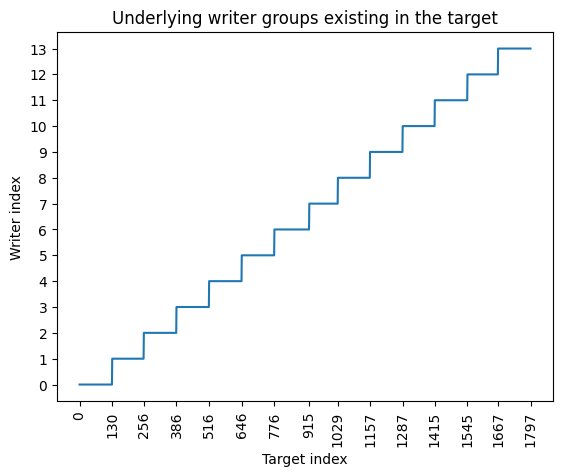

In [66]:
from itertools import count
import numpy as np

# defines the lower and upper bounds of sample indices
# for each writer
writer_boundaries = [
    0,
    130,
    256,
    386,
    516,
    646,
    776,
    915,
    1029,
    1157,
    1287,
    1415,
    1545,
    1667,
    1797,
]
groups = np.zeros_like(target)
lower_bounds = writer_boundaries[:-1]
upper_bounds = writer_boundaries[1:]


for group_id, lb, up in zip(count(), lower_bounds, upper_bounds):
    groups[lb:up] = group_id



plt.plot(groups)
plt.yticks(np.unique(groups))
plt.xticks(writer_boundaries, rotation=90)
plt.xlabel("Target index")
plt.ylabel("Writer index")
_ = plt.title("Underlying writer groups existing in the target")

In [67]:
# Using GroupKFold
from sklearn.model_selection import GroupKFold

cv = GroupKFold()
test_score = cross_val_score(
    model, data, target, groups=groups, cv=cv, n_jobs=2
)
print(
    f"The average accuracy is {test_score.mean():.3f} ± {test_score.std():.3f}"
)

The average accuracy is 0.920 ± 0.021


This strategy is less optimistic regarding the model generalization performance. However, if the goal is to make handwritten digits recognition writers independent, this is the most reliable strategy.

In [68]:
all_scores = pd.DataFrame(
    [test_score_no_shuffling, test_score_with_shuffling, test_score],
    index=[
        "KFold without shuffling",
        "KFold with shuffling",
        "KFold with groups",
    ],
).T

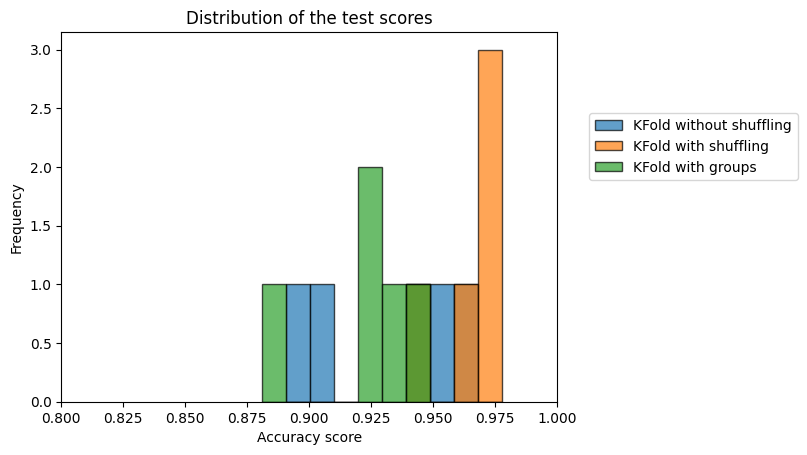

In [69]:
all_scores.plot.hist(bins=10, edgecolor="black", alpha=0.7)
plt.xlim([0.8, 1.0])
plt.xlabel("Accuracy score")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
_ = plt.title("Distribution of the test scores")

> As a conclusion, it is really important to take any sample grouping pattern
into account when evaluating a model. Otherwise, the results obtained will be
over-optimistic in regards with reality.

## Non-i.i.d Data 


In machine learning, it is quite common to assume that the data are i.i.d,
meaning that the generative process does not have any memory of past samples
to generate new samples.

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">i.i.d is the acronym of "independent and identically distributed"
(as in "independent and identically distributed random variables").</p>
</div>

This assumption is usually violated when dealing with time series. A sample
depends on past information.


In [70]:
symbols = {
    "TOT": "Total",
    "XOM": "Exxon",
    "CVX": "Chevron",
    "COP": "ConocoPhillips",
    "VLO": "Valero Energy",
}

data_path = 'Financial Data/{}.csv'


quotes = {}


for symbol in symbols:
    data = pd.read_csv(
        # Load the data
        data_path.format(symbol), 
        # Parse the index col
        index_col=0, 
        # Parse Dates
        parse_dates=True
    )
    quotes[symbols[symbol]] = data['open']


df = pd.DataFrame(quotes)

# Preview the df
df.head()

,Total,Exxon,Chevron,ConocoPhillips,Valero Energy
date,,,,,
2003-01-02,71.62,35.00,67.20,48.80,37.04
2003-01-03,72.12,35.25,67.82,49.53,38.13
2003-01-06,72.93,35.45,68.34,49.50,37.37
2003-01-07,72.40,36.05,69.75,49.85,37.46
2003-01-08,69.51,35.15,68.46,48.44,36.51


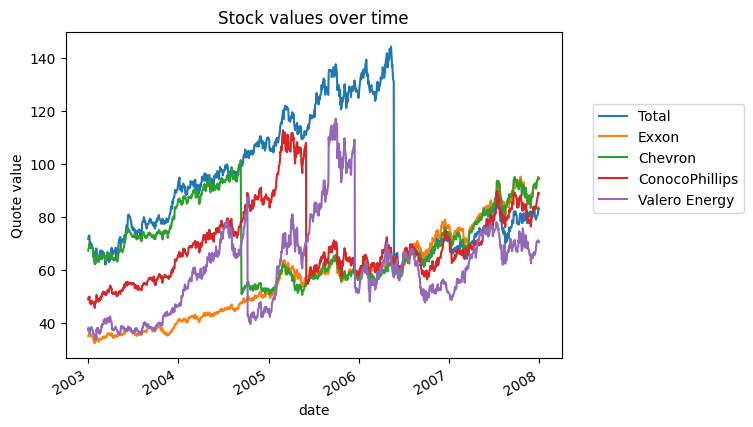

In [72]:
df.plot()
plt.ylabel("Quote value")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
_ = plt.title("Stock values over time")

Here, we want to `predict the quotation of Chevron` using all other energy
companies' quotes. To make explanatory plots, we first use a train-test split
and then we evaluate other cross-validation methods.

In [73]:
from sklearn.model_selection import train_test_split

data, target = df.drop(columns=["Chevron"]), quotes["Chevron"]
data_train, data_test, target_train, target_test = train_test_split(
    data, target, shuffle=True, random_state=0
)

We will use a decision tree regressor that we expect to overfit and thus not
generalize to unseen data. We will use a `ShuffleSplit` cross-validation to
check the generalization performance of our model.

Let's first define our model

In [75]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit


regressor = DecisionTreeRegressor()

cv = ShuffleSplit(random_state=0)

test_score = cross_val_score(
    regressor, 
    data_train, 
    target_train, 
    cv=cv, 
    n_jobs=2
)
print(f"The mean R2 is: {test_score.mean():.2f} ± {test_score.std():.2f}")


The mean R2 is: 0.95 ± 0.07


Surprisingly, we get outstanding generalization performance. We will
investigate and find the reason for such good results with a model that is
expected to fail


t. We will simplify t is
procedure with a single split and plot the prediction. We can use
`train_test_split` for this purpose.

In [76]:
regressor.fit(data_train, target_train)
target_predicted = regressor.predict(data_test)
# Affect the index of `target_predicted` to ease the plotting
target_predicted = pd.Series(target_predicted, index=target_test.index)

In [77]:
from sklearn.metrics import r2_score

test_score = r2_score(target_test, target_predicted)
print(f"The R2 on this single split is: {test_score:.2f}")

The R2 on this single split is: 0.83


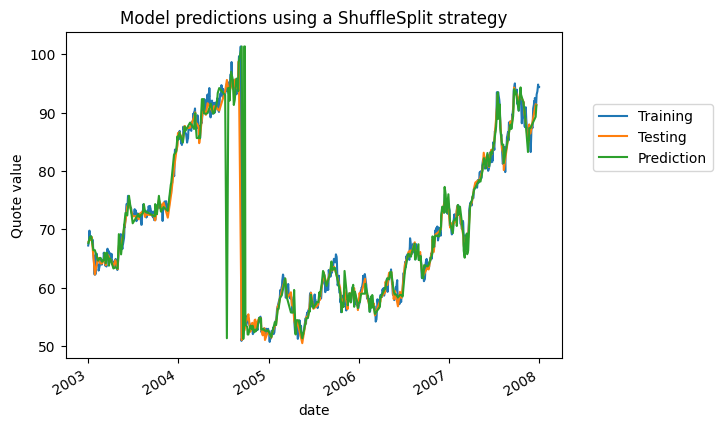

In [78]:
target_train.plot(label="Training")
target_test.plot(label="Testing")
target_predicted.plot(label="Prediction")

plt.ylabel("Quote value")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
_ = plt.title("Model predictions using a ShuffleSplit strategy")

So in this context, it seems that the model predictions are following the
testing. But we can also see that the testing samples are next to some
training sample. And with these time-series, we see a relationship between a
sample at the time `t` and a sample at `t+1`. In this case, we are violating
the i.i.d. assumption. `The insight to get is the following: a model can output
of its training set at the time `t` for a testing sample at the time `t+1`.
This prediction would be close to the true value even if our model did not
learn anything, but just memorized the training dataset.`

An easy way to verify this hypothesis is to not shuffle the data when doing
the split. In this case, we will use the first 75% of the data to train and
the remaining data to test.

In [80]:
data_train, data_test, target_train, target_test = train_test_split(
    data,
    target,
    shuffle=False,
    random_state=0,
)
regressor.fit(data_train, target_train)
target_predicted = regressor.predict(data_test)
target_predicted = pd.Series(target_predicted, index=target_test.index)

test_score = r2_score(target_test, target_predicted)
print(f"The R2 on this single split is: {test_score:.2f}")

The R2 on this single split is: -2.42


In this case, we see that our model is not magical anymore. Indeed, it
performs worse than just predicting the mean of the target. We can visually
check what we are predicting.

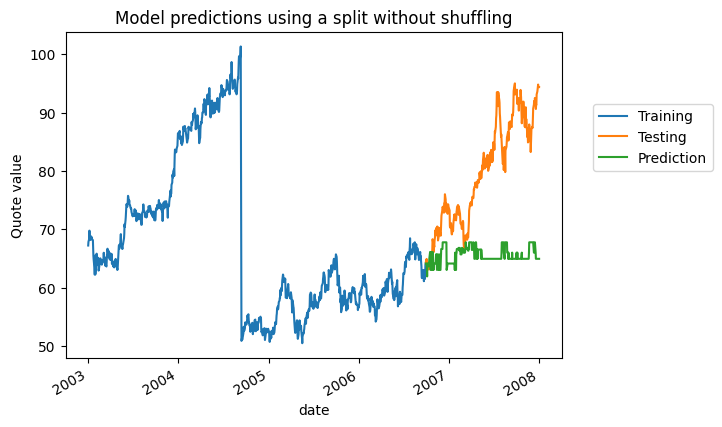

In [81]:
target_train.plot(label="Training")
target_test.plot(label="Testing")
target_predicted.plot(label="Prediction")

plt.ylabel("Quote value")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
_ = plt.title("Model predictions using a split without shuffling")

We see that our model cannot predict anything because it doesn't have samples
around the testing sample. Let's check how we could have made a proper
cross-validation scheme to get a reasonable generalization performance
estimate.

One solution would be to group the samples into time blocks, e.g. by quarter,
and predict each group's information by using information from the other
groups. We can use the `LeaveOneGroupOut` cross-validation for this purpose.

In [84]:
from sklearn.model_selection import LeaveOneGroupOut


groups = df.index.to_period('Q')

cv = LeaveOneGroupOut()
test_score = cross_val_score(
    regressor, 
    data, 
    target, 
    cv=cv, 
    groups=groups, 
    n_jobs=2
)


print(f"The mean R2 is: {test_score.mean():.2f} ± {test_score.std():.2f}")

The mean R2 is: -1.32 ± 2.44


In this case, we see that we cannot make good predictions, which is less
surprising than our original results.

Another thing to consider is the actual application of our solution. If our
model is aimed at forecasting (i.e., predicting future data from past data),
we should not use training data that are ulterior to the testing data. In this
case, we can use the `TimeSeriesSplit` cross-validation to enforce this
behaviour.

In [87]:
from sklearn. model_selection import TimeSeriesSplit


# 20 Groups showing each quarter
cv = TimeSeriesSplit(n_splits=groups.nunique())

test_score = cross_val_score(
    regressor, 
    data, 
    target, 
    cv=cv, 
    groups=groups, 
    n_jobs=2
)
print(f"The mean R2 is: {test_score.mean():.2f} ± {test_score.std():.2f}")

The mean R2 is: -2.29 ± 3.46


In conclusion, it is really important to not use an out of the shelves
cross-validation strategy which do not respect some assumptions such as having
i.i.d data. It might lead to absurd results which could make think that a
predictive model might work.

## Nested Cross-Validation


Cross-validation can be used both for `hyperparameter tuning` and for `estimating
the generalization performance of a mode`l. However, using it for both purposes
at the same time is problematic, as the resulting evaluation can underestimate
some overfitting that results from the hyperparameter tuning procedure itself.

Philosophically, hyperparameter tuning is a form of machine learning itself
and therefore, we need another outer loop of cross-validation to properly
evaluate the generalization performance of the full modeling proceHere, I highlight ghlights nested cross-validation and its impact on the
estimated generalization performance compared to naively using a single level
of cross-validation, both for hyperparameter tuning and evaluation of the
generalization performance.

We will illustrate this difference using the breast cancer dataset.

In [88]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

data, target = load_breast_cancer(return_X_y=True)

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1]
}


model_to_tune = SVC()


search = GridSearchCV(
    estimator=model_to_tune,
    param_grid=param_grid,
    n_jobs=2
)

search.fit(data, target)

GridSearchCV(estimator=SVC(), n_jobs=2,
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.01, 0.1]})

We recall that, internally, `GridSearchCV` trains several models for each on
sub-sampled training sets and evaluate each of them on the matching testing
sets using cross-validation. This evaluation procedure is controlled via using
the `cv` parameter. The procedure is then repeated for all possible
combinations of parameters given in `param_grid`.

The attribute `best_params_` gives us the best set of parameters that maximize
the mean score on the internal test sets.

In [89]:
print(f"The best parameters found are: {search.best_params_}")

The best parameters found are: {'C': 0.1, 'gamma': 0.01}


In [90]:
print(f"The mean CV score of the best model is: {search.best_score_:.3f}")

The mean CV score of the best model is: 0.627


At this stage, one should be extremely careful using this score. The
misinterpretation would be the following: since this mean score was computed
using cross-validation test sets, we could use it to assess the generalization
performance of the model trained with the best hyper-parameters.

However, we should not forget that we used this score to pick-up the best
model. It means that we used knowledge from the test sets (i.e. test scores)
to select the hyper-parameter of the model it-self.

> Thus, this mean score is not a fair estimate of our testing error. Indeed, it
can be too optimistic, in particular when running a parameter search on a
large grid with many hyper-parameters and many possible values per
hyper-parameter. A way to avoid this pitfall is to use a "nested"
cross-validation.

In the following, we will use an `inner cross-validation corresponding to the
previous procedure above to only optimize the hyperparameters.` We will also
embed this tuning procedure within an `outer cross-validation, which is
dedicated to estimate the testing error of our tuned model`.

> In this case, our inner cross-validation always gets the training set of the
outer cross-validation, making it possible to always compute the final testing
scores on completely independent sets of samples.

Let us do this in one go as follows:

In [92]:
from sklearn.model_selection import cross_val_score, KFold

# Declaring the inner and outer cross-validation strategies
inner_cv = KFold(n_splits=5, shuffle=True, random_state=123)
outer_cv = KFold(n_splits=3, shuffle=True, random_state=123)


# Inner cross-validation for parameter search
model = GridSearchCV(
    estimator=model_to_tune, 
    param_grid=param_grid, 
    cv=inner_cv, 
    n_jobs=2
)

# Outer cross-validation to compute the testing score
test_score = cross_val_score(
    model, 
    data, 
    target, 
    cv=outer_cv, 
    n_jobs=2
)


print(
    "The mean score using nested cross-validation is: "
    f"{test_score.mean():.3f} ± {test_score.std():.3f}"
)

The mean score using nested cross-validation is: 0.627 ± 0.026


The reported score is more trustworthy and should be close to production's
expected generalization performance. Note that in this case, the two score
values are very close for this first trial.

We would like to better assess the difference between the nested and
non-nested cross-validation scores to show that the latter can be too
optimistic in practice. To do this, we repeat the experiment several times and
shuffle the data differently to ensure that our conclusion does not depend on
a particular resampling of the data.

In [93]:
test_score_not_nested = []
test_score_nested = []


N_TRIALS = 20
for i in range(N_TRIALS):
    # For each trial, we use cross-validation splits on independently
    # randomly shuffled data by passing distinct values to the random_state
    # parameter.
    inner_cv = KFold(n_splits=5, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=3, shuffle=True, random_state=i)

    # Non_nested parameter search and scoring
    model = GridSearchCV(
        estimator=model_to_tune, param_grid=param_grid, cv=inner_cv, n_jobs=2
    )
    model.fit(data, target)
    test_score_not_nested.append(model.best_score_)

    # Nested CV with parameter optimization
    test_score = cross_val_score(model, data, target, cv=outer_cv, n_jobs=2)
    test_score_nested.append(test_score.mean())



all_scores = {
    "Not nested CV": test_score_not_nested,
    "Nested CV": test_score_nested,
}
all_scores = pd.DataFrame(all_scores)

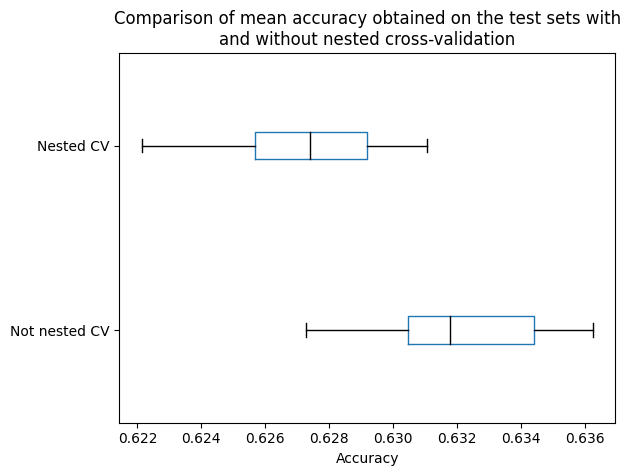

In [94]:

color = {"whiskers": "black", "medians": "black", "caps": "black"}

all_scores.plot.box(color=color, vert=False)

plt.xlabel("Accuracy")
_ = plt.title(
    "Comparison of mean accuracy obtained on the test sets with\n"
    "and without nested cross-validation"
)

We observe that the generalization performance estimated without using nested
CV is higher than what we obtain with nested CV. The reason is that the tuning
procedure itself selects the model with the highest inner CV score. If there
are many hyper-parameter combinations and if the inner CV scores have
comparatively large standard deviations, taking the maximum value can lure the
naive data scientist into over-estimating the true generalization performance
of the result of the full learning procedure. By using an outer
cross-validation procedure, one gets a more trustworthy estimate of the
generalization performance of the full learning procedure, including the
effect of tuning the hyperparameters.


As a conclusion, when optimizing parts of the machine learning pipeline (e.g.
hyperparameter, transform, etc.), one needs to use nested cross-validation to
evaluate the generalization performance of the predictive model. Otherwise,
the results obtained without nested cross-validation are often overly
optimistic.

## Classification Metrics

Machine learning models rely on optimizing an objective function, by seeking
its minimum or maximum. It is important to understand that this objective
function is usually decoupled from the evaluation metric that we want to
optimize in practice. The objective function serves as a proxy for the
evaluation met


This notebook aims at giving an overview of the classification metrics that
can be used to evaluate the predictive model generalization performance. We
can recall that in a classification setting, the vector `target` is
categorical rather than continuous.ric.


In [95]:
df_url = 'https://raw.githubusercontent.com/INRIA/scikit-learn-mooc/main/datasets/blood_transfusion.csv'


df = pd.read_csv(df_url)
data = df.drop(columns='Class')
target = df['Class']

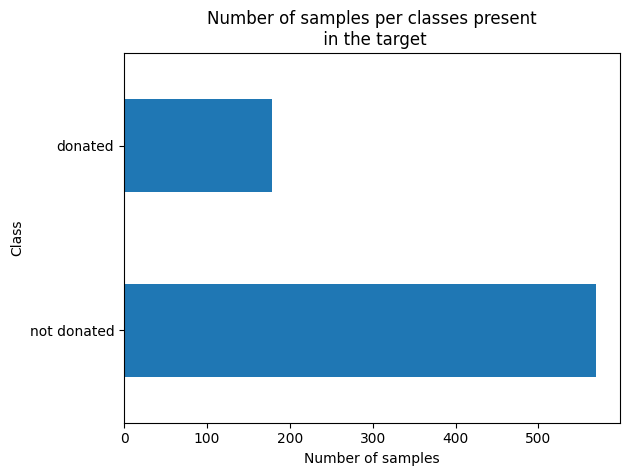

In [98]:
(
    target
    .value_counts()
    .plot.barh()
)

plt.xlabel("Number of samples")
_ = plt.title("Number of samples per classes present\n in the target")

We can see that the vector `target` contains two classes corresponding to
whether a subject gave blood. We will use a logistic regression classifier to
predict this outcome.

To focus on the metrics presentation, we will only use a single split instead
of cross-validation.

In [100]:
data_train, data_test, target_train, target_test = train_test_split(
    data, target, shuffle=True, random_state=0, test_size=0.5
)


classifier = LogisticRegression()
classifier.fit(data_train, target_train)

LogisticRegression()

## Classifier predictions

Before we go into details regarding the metrics, we will recall what type of
predictions a classifier can provide.

For this reason, we will create a synthetic sample for a new potential donor:
they donated blood twice in the past (1000 c.c. each time). The last time was
6 months ago, and the first time goes back to 20 months ago.

In [101]:
new_donor = pd.DataFrame(
    {
        'Recency':[6],
        'Frequency':[2],
        'Monetary':[1000],
        'Time':[20]
    }
)


classifier.predict(new_donor)

array(['not donated'], dtype=object)

With this information, our classifier predicts that this synthetic subject is
more likely to not donate blood again.

However, we cannot check whether the prediction is correct (we do not know the
true target value). That's the purpose of the testing set. First, we predict
whether a subject will give blood with the help of the trained classifier.

In [102]:
target_predicted = classifier.predict(data_test)
target_predicted[:5]

array(['not donated', 'not donated', 'not donated', 'not donated',
       'donated'], dtype=object)

## Accuracy as a baseline

Now that we have these predictions, we can compare them with the true
predictions (sometimes called ground-truth) which we did not use until now.

In [103]:
target_test == target_predicted

258     True
521    False
14     False
31     False
505     True
       ...  
665     True
100    False
422     True
615     True
743     True
Name: Class, Length: 374, dtype: bool

In the comparison above, a `True` value means that the value predicted by our
classifier is identical to the real value, while a `False` means that our
classifier made a mistake. One way of getting an overall rate representing the
generalization performance of our classifier would be to compute how many
times our classifier was right and divide it by the number of samples in our
set.

In [104]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(target_test, target_predicted)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.778


## Confusion matrix and derived metrics

The comparison that we did above and the accuracy that we calculated did not
take into account the type of error our classifier was making. Accuracy is an
aggregate of the errors made by the classifier. We may be interested in finer
granularity - to know independently what the error is for each of the two
following cases:

- we predicted that a person will give blood but they did not;
- we predicted that a person will not give blood but they did.

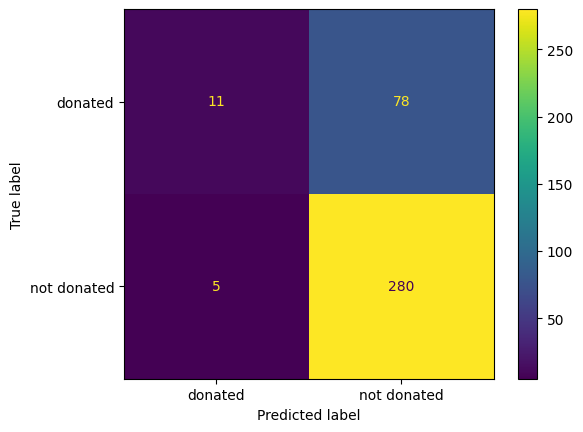

In [105]:
from sklearn.metrics import ConfusionMatrixDisplay

_ = ConfusionMatrixDisplay.from_estimator(classifier, data_test, target_test)

The in-diagonal numbers are related to predictions that were correct while
off-diagonal numbers are related to incorrect predictions
(misclassifications). We now know the four types of correct and erroneous
predictions:

* the top left corner are true positives (TP) and corresponds to people who
  gave blood and were predicted as such by the classifier;
* the bottom right corner are true negatives (TN) and correspond to people who
  did not give blood and were predicted as such by the classifier;
* the top right corner are false negatives (FN) and correspond to people who
  gave blood but were predicted to not have given blood;
* the bottom left corner are false positives (FP) and correspond to people who
  did not give blood but were predicted to have given blood.

Once we have split this information, we can compute metrics to highlight the
generalization performance of our classifier in a particular setting. For
instance, we could be interested in the fraction of people who really gave
blood when the classifier predicted so or the fraction of people predicted to
have given blood out of the total population that actually did so.

The former metric, known as the precision, is defined as TP / (TP + FP) and
represents how likely the person actually gave blood when the classifier
predicted that they did. The latter, known as the recall, defined as TP / (TP + FN) and assesses how well the classifier is able to correctly identify
people who did give blood. We could, similarly to accuracy, manually compute
these values, however scikit-learn provides functions to compute these
statistics.

In [106]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(target_test, target_predicted, pos_label="donated")
recall = recall_score(target_test, target_predicted, pos_label="donated")

print(f"Precision score: {precision:.3f}")
print(f"Recall score: {recall:.3f}")

Precision score: 0.688
Recall score: 0.124


These results are in line with what was seen in the confusion matrix. Looking
at the left column, more than half of the "donated" predictions were correct,
leading to a precision above 0.5. However, our classifier mislabeled a lot of
people who gave blood as "not donated", leading to a very low recall of around
0.1.

## The issue of class imbalance
At this stage, we could ask ourself a reasonable question. While the accuracy
did not look bad (i.e. 77%), the recall score is relatively low (i.e. 12%).

As we mentioned, precision and recall only focuses on samples predicted to be
positive, while accuracy takes both into account. In addition, we did not look
at the ratio of classes (labels). We could check this ratio in the training
set.

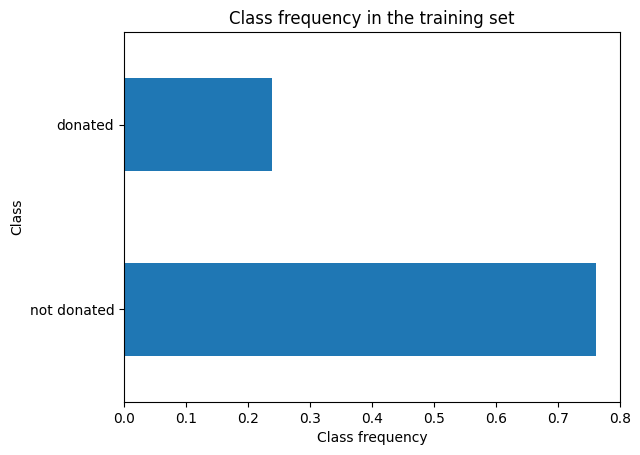

In [107]:
(
    target_train
    .value_counts(normalize=True)
    .plot.barh()
)


plt.xlabel("Class frequency")
_ = plt.title("Class frequency in the training set")

We observe that the positive class, `'donated'`, comprises only 24% of the
samples. The good accuracy of our classifier is then linked to its ability to
correctly predict the negative class `'not donated'` which may or may not be
relevant, depending on the application. We can illustrate the issue using a
dummy classifier as a baseline.

In [108]:
from sklearn.dummy import DummyClassifier

dummy_classifier = DummyClassifier(strategy="most_frequent")
dummy_classifier.fit(data_train, target_train)
print(
    "Accuracy of the dummy classifier: "
    f"{dummy_classifier.score(data_test, target_test):.3f}"
)

Accuracy of the dummy classifier: 0.762


With the dummy classifier, which always predicts the negative class `'not
donated'`, we obtain an accuracy score of 76%. Therefore, it means that this
classifier, without learning anything from the data `data`, is capable of
predicting as accurately as our logistic regression model.

The problem illustrated above is also known as the class imbalance problem.
When the classes are imbalanced, accuracy should not be used. In this case,
one should either u`se the pr`ecisi`on and` recall as presented above `or the
balanced accura`cy score instead of accuracy.

In [109]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy = balanced_accuracy_score(target_test, target_predicted)
print(f"Balanced accuracy: {balanced_accuracy:.3f}")

Balanced accuracy: 0.553


The balanced accuracy is equivalent to accuracy in the context of balanced
classes. It is defined as the average recall obtained on each class.

## Evaluation and different probability thresholds

All statistics that we presented up to now rely on `classifier.predict` which
outputs the most likely label. We haven't made use of the probability
associated with this prediction, which gives the confidence of the classifier
in this prediction. By default, the prediction of a classifier corresponds to
a threshold of 0.5 probability in a binary classification problem. We can
quickly check this relationship with the classifier that we trained.

In [110]:
target_proba_predicted = pd.DataFrame(
    classifier.predict_proba(data_test), columns=classifier.classes_
)
target_proba_predicted[:5]

,donated,not donated
0,0.271820,0.728180
1,0.451764,0.548236
2,0.445211,0.554789
3,0.441577,0.558423
4,0.870583,0.129417


In [111]:
target_predicted = classifier.predict(data_test)
target_predicted[:5]

array(['not donated', 'not donated', 'not donated', 'not donated',
       'donated'], dtype=object)

In [112]:
equivalence_pred_proba = (
    target_proba_predicted
    .idxmax(axis=1)
    .to_numpy() == target_predicted
)
np.all(equivalence_pred_proba)

True

The default decision threshold (0.5) might not be the best threshold that
leads to optimal generalization performance of our classifier. In this case,
one can vary the decision threshold, and therefore the underlying prediction,
and compute the same statistics presented earlier. Usually, the two metrics
recall and precision are computed and plotted on a graph. Each metric plotted
on a graph axis and each point on the graph corresponds to a specific decision
threshold. Let's start by computing the precision-recall curve.

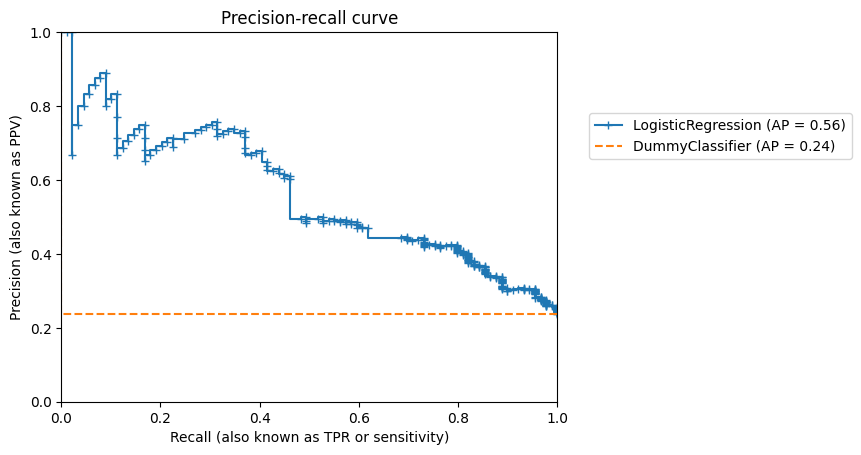

In [113]:
from sklearn.metrics import PrecisionRecallDisplay

disp = PrecisionRecallDisplay.from_estimator(
    classifier, data_test, target_test, pos_label="donated", marker="+"
)
disp = PrecisionRecallDisplay.from_estimator(
    dummy_classifier,
    data_test,
    target_test,
    pos_label="donated",
    color="tab:orange",
    linestyle="--",
    ax=disp.ax_,
)
plt.xlabel("Recall (also known as TPR or sensitivity)")
plt.ylabel("Precision (also known as PPV)")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
_ = disp.ax_.set_title("Precision-recall curve")

<div class="admonition tip alert alert-warning">
<p class="first admonition-title" style="font-weight: bold;">Tip</p>
<p class="last">Scikit-learn will return a display containing all plotting element. Notably,
displays will expose a matplotlib axis, named <tt class="docutils literal">ax_</tt>, that can be used to add
new element on the axis.
You can refer to the documentation to have more information regarding the
<a class="reference external" href="https://scikit-learn.org/stable/visualizations.html#visualizations">visualizations in scikit-learn</a></p>
</div>

On this curve, each blue cross corresponds to a level of probability which we
used as a decision threshold. We can see that, by varying this decision
threshold, we get different precision vs. recall values.

A perfect classifier would have a precision of 1 for all recall values. A
metric characterizing the curve is linked to the area under the curve (AUC)
and is named average precision (AP). With an ideal classifier, the average
precision would be 1.

Notice that the AP of a `DummyClassifier`, used as baseline to define the
chance level, coincides with the number of samples in the positive class
divided by the total number of samples (this number is called the prevalence
of the positive class).

In [114]:
prevalence = target_test.value_counts()[1] / target_test.value_counts().sum()
print(f"Prevalence of the class 'donated': {prevalence:.2f}")

Prevalence of the class 'donated': 0.24


The precision and recall metric focuses on the positive class, however, one
might be interested in the compromise between accurately discriminating the
positive class and accurately discriminating the negative classes. The
statistics used for this are `sensitivity` and `specificity`. Sensitivity is just
another name for recall. However, specificity measures the proportion of
correctly classified samples in the negative class defined as: TN / (TN + FP).


Similar to the precision-recall curve, sensitivity and specificity are
generally plotted as a curve called the Receiver Operating Characteristic
(ROC) curve. Below is such a curve:

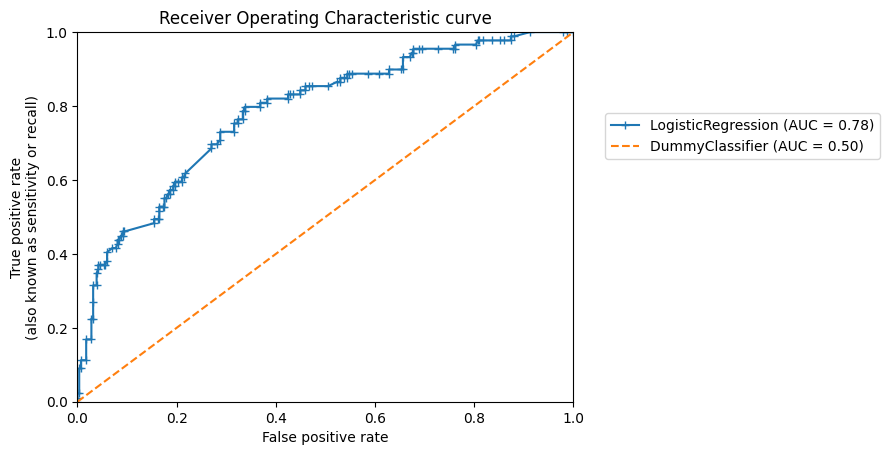

In [115]:
from sklearn.metrics import RocCurveDisplay

disp = RocCurveDisplay.from_estimator(
    classifier, data_test, target_test, pos_label="donated", marker="+"
)
disp = RocCurveDisplay.from_estimator(
    dummy_classifier,
    data_test,
    target_test,
    pos_label="donated",
    color="tab:orange",
    linestyle="--",
    ax=disp.ax_,
)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate\n(also known as sensitivity or recall)")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
_ = disp.ax_.set_title("Receiver Operating Characteristic curve")

This curve was built using the same principle as the precision-recall curve:
we vary the probability threshold for determining "hard" prediction and
compute the metrics. As with the precision-recall curve, we can compute the
area under the ROC (ROC-AUC) to characterize the generalization performance of
our classifier. However, it is important to observe that the lower bound of
the ROC-AUC is 0.5. Indeed, we show the generalization performance of a dummy
classifier (the orange dashed line) to show that even the worst generalization
performance obtained will be above this line.

Instead of using a dummy classifier, you can use the parameter `plot_chance_level`
available in the ROC and PR displays:

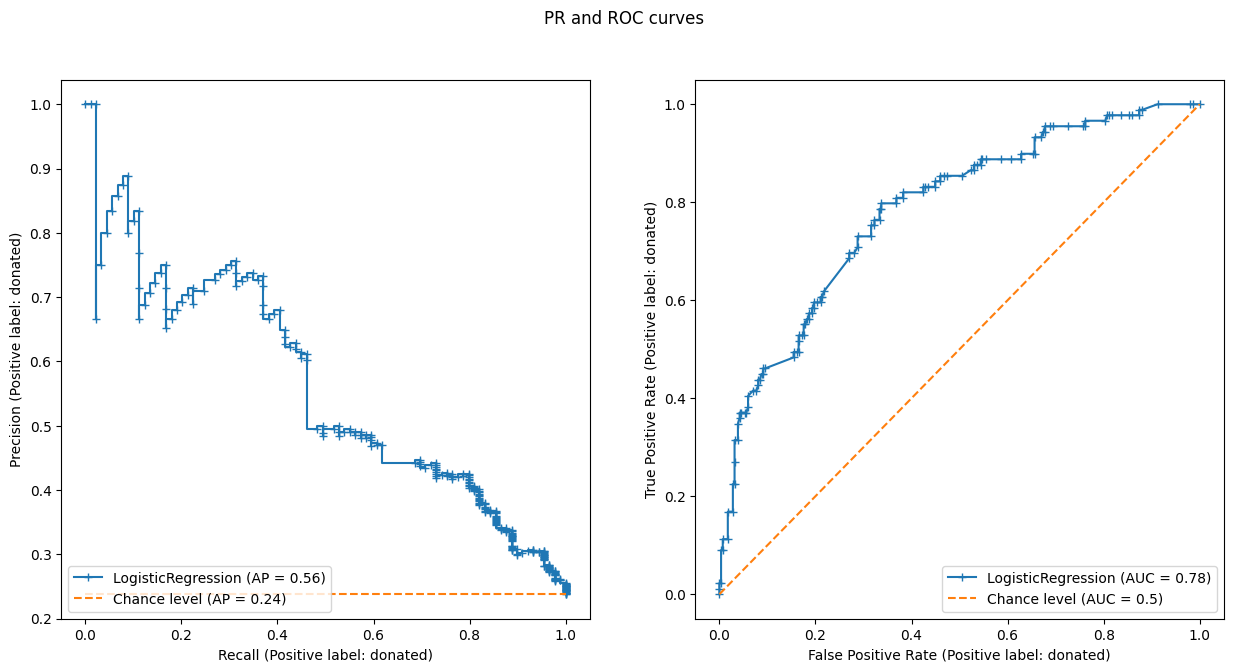

In [116]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(15, 7))

PrecisionRecallDisplay.from_estimator(
    classifier,
    data_test,
    target_test,
    pos_label="donated",
    marker="+",
    plot_chance_level=True,
    chance_level_kw={"color": "tab:orange", "linestyle": "--"},
    ax=axs[0],
)
RocCurveDisplay.from_estimator(
    classifier,
    data_test,
    target_test,
    pos_label="donated",
    marker="+",
    plot_chance_level=True,
    chance_level_kw={"color": "tab:orange", "linestyle": "--"},
    ax=axs[1],
)

_ = fig.suptitle("PR and ROC curves")

## Regression Metrics



In [117]:
df_url = 'https://raw.githubusercontent.com/INRIA/scikit-learn-mooc/main/datasets/house_prices.csv'

df = pd.read_csv(df_url)
data = df.drop(columns='SalePrice')
target = df['SalePrice']
data = data.select_dtypes(np.number)
target /= 1000


data_train, data_test, target_train, target_test = train_test_split(
    data, 
    target, 
    shuffle=True, 
    random_state=0
)

Some machine learning models are designed to be solved as an optimization
problem: minimizing an error (also known as the loss function) using a
training set. A basic loss function used in regression is the mean squared
error (MSE). Thus, this metric is sometimes used to evaluate the model since
it is optimized by said modmodel.

Some machine learning models are designed to be solved as an optimization
problem: minimizing an error (also known as the loss function) using a
training set. A basic loss function used in regression is the mean squared
error (MSE). Thus, this metric is sometimes used to evaluate the model since
it is optimized by said model.

We give an example using a linear regression model.

In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


regressor = LinearRegression()
regressor.fit(data_train, target_train)
target_predicted = regressor.predict(data_train)

print(
    "Mean squared error on the training set: "
    f"{mean_squared_error(target_train, target_predicted):.3f}"
)

Mean squared error on the training set: 996.902


Our linear regression model is minimizing the mean squared error on the
training set. It means that there is no other set of coefficients which
decreases the error.

Then, we can compute the mean squared error on the test set.

In [119]:
target_predicted = regressor.predict(data_test)

print(
    "Mean squared error on the testing set: "
    f"{mean_squared_error(target_test, target_predicted):.3f}"
)

Mean squared error on the testing set: 2064.736


The raw MSE can be difficult to interpret. One way is to rescale the MSE by
the variance of the target. This score is known as the $R^2$ also called the
[coefficient of
determination](https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score-the-coefficient-of-determination).
Indeed, this is the default score used in scikit-learn by calling the method
`score`.

In [120]:
regressor.score(data_test, target_test)

0.6872520581075546

The $R^2$ score represents the proportion of variance of the target that is
explained by the independent variables in the model. The best score possible
is 1 but there is no lower bound. However, a model that predicts the expected
value of the target would get a score of 0.

In [121]:
# Using the Dummy Regressor

from sklearn.dummy import DummyRegressor

dummy_regressor = DummyRegressor(strategy="mean")
dummy_regressor.fit(data_train, target_train)
print(
    "R2 score for a regressor predicting the mean:"
    f"{dummy_regressor.score(data_test, target_test):.3f}"
)

R2 score for a regressor predicting the mean:-0.000


The $R^2$ score gives insight into the quality of the model's fit. However,
this score cannot be compared from one dataset to another and the value
obtained does not have a meaningful interpretation relative the original unit
of the target. If we wanted to get an interpretable score, we would be
interested in the median or mean absolute error.

In [122]:
from sklearn.metrics import mean_absolute_error

target_predicted = regressor.predict(data_test)
print(
    "Mean absolute error: "
    f"{mean_absolute_error(target_test, target_predicted):.3f} k$"
)

Mean absolute error: 22.608 k$


> By computing the mean absolute error, we can interpret that our model is
predicting on average 22.6 k\\$ away from the true house price. A disadvantage
of this metric is that the mean can be impacted by large error. For some
applications, we might not want these large errors to have such a big
influence on our metric. In this case we can use the median absolute error.

In [123]:
from sklearn.metrics import median_absolute_error

print(
    "Median absolute error: "
    f"{median_absolute_error(target_test, target_predicted):.3f} k$"
)

Median absolute error: 14.137 k$


> The mean absolute error (or median absolute error) still have a known
limitation: committing an error of 50 k\\$ for a house valued at 50 k\\$ has the
same impact than committing an error of 50 k\\$ for a house valued at 500 k\\$.
Indeed, the mean absolute error is not relative. The mean absolute percentage error introduce this relative scaling.

In [124]:
from sklearn.metrics import mean_absolute_percentage_error

print(
    "Mean absolute percentage error: "
    f"{mean_absolute_percentage_error(target_test, target_predicted) * 100:.3f} %"
)

Mean absolute percentage error: 13.574 %


In addition to using metrics, we can visualize the results by plotting the
predicted values versus the true values.

In an ideal scenario where all variations in the target could be perfectly
explained by the obseved features (i.e. without any unobserved factors of
variations), and we have chosen an optimal model, we would expect all
predictions to fall along the diagonal line of the first plot below.

In the real life, this is almost never the case: some unknown fraction of the
variations in the target cannot be explained by variations in data: they stem
from external factors not represented by the observed features.

Therefore, the best we can hope for is that our model's predictions form a
cloud of points symmetrically distributed around the diagonal line, ideally
close enough to it for the model to be useful.

To gain more insight, it can be helpful to plot the residuals, which represent
the difference between the actual and predicted values, against the predicted
values. This is shown in the second plot.

Residual plots make it easier to assess if the residuals exhibit a variance
independent of the target values or if there is any systematic bias of the
model associated with the lowest or highest predicted values.

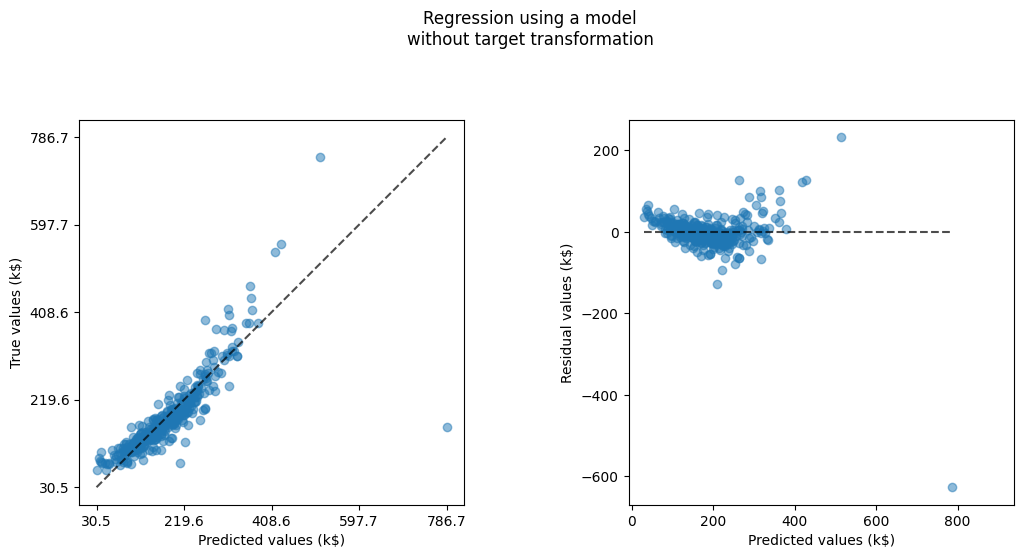

In [125]:
import matplotlib.pyplot as plt
from sklearn.metrics import PredictionErrorDisplay

fig, axs = plt.subplots(ncols=2, figsize=(13, 5))

PredictionErrorDisplay.from_predictions(
    y_true=target_test,
    y_pred=target_predicted,
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
    ax=axs[0],
)
axs[0].axis("square")
axs[0].set_xlabel("Predicted values (k$)")
axs[0].set_ylabel("True values (k$)")

PredictionErrorDisplay.from_predictions(
    y_true=target_test,
    y_pred=target_predicted,
    kind="residual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
    ax=axs[1],
)
axs[1].axis("square")
axs[1].set_xlabel("Predicted values (k$)")
axs[1].set_ylabel("Residual values (k$)")

_ = fig.suptitle(
    "Regression using a model\nwithout target transformation", y=1.1
)

On these plots, we see that our model tends to under-estimate the price of the
house both for the lowest and large True price values. This means that the
residuals still hold some **structure typically visible as the "banana" or
"smile" shape of the residual plot**. This is often a clue that our model
could be improved, either by transforming the features, the target or
sometimes changing the model type or its parameters. In this case let's try to
see if the model would benefit from a target transformation that monotonically
reshapes the target variable to follow a normal distribution.

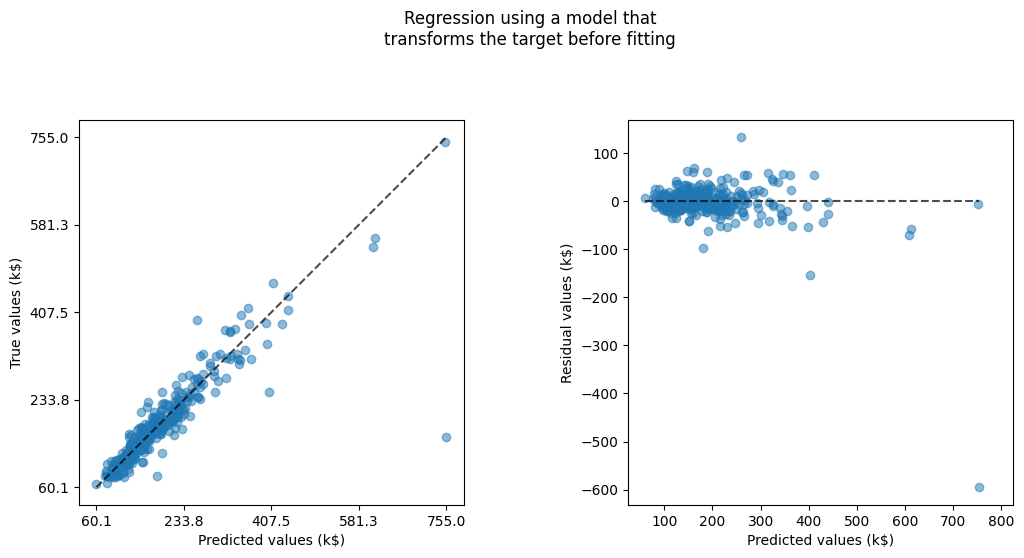

In [126]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.compose import TransformedTargetRegressor


transformer = QuantileTransformer(
    n_quantiles=900, output_distribution="normal"
)


model_transformed_target = TransformedTargetRegressor(
    regressor=regressor, 
    transformer=transformer
)


model_transformed_target.fit(data_train, target_train)


target_predicted = model_transformed_target.predict(data_test)


fig, axs = plt.subplots(ncols=2, figsize=(13, 5))


PredictionErrorDisplay.from_predictions(
    y_true=target_test,
    y_pred=target_predicted,
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
    ax=axs[0],
)


axs[0].axis("square")
axs[0].set_xlabel("Predicted values (k$)")
axs[0].set_ylabel("True values (k$)")



PredictionErrorDisplay.from_predictions(
    y_true=target_test,
    y_pred=target_predicted,
    kind="residual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
    ax=axs[1],
)



axs[1].axis("square")
axs[1].set_xlabel("Predicted values (k$)")
axs[1].set_ylabel("Residual values (k$)")



_ = fig.suptitle(
    "Regression using a model that\ntransforms the target before fitting",
    y=1.1,
)

The model with the transformed target seems to exhibit fewer structure in its
residuals: over-estimation and under-estimation errors seems to be more
balanced.

We can confirm this by computing the previously mentioned metrics and observe
that they all improved w.r.t. the linear regression model without the target
transformation.

In [127]:
print(
    "Mean absolute error: "
    f"{mean_absolute_error(target_test, target_predicted):.3f} k$"
)
print(
    "Median absolute error: "
    f"{median_absolute_error(target_test, target_predicted):.3f} k$"
)
print(
    "Mean absolute percentage error: "
    f"{mean_absolute_percentage_error(target_test, target_predicted):.2%}"
)

Mean absolute error: 17.406 k$
Median absolute error: 10.327 k$
Mean absolute percentage error: 9.92%


While a common practice, performing such a target transformation for linear
regression is often disapproved by statisticians. It is mathematically more
justified to instead adapt the loss function of the regression model itself,
for instance by fitting a
[`PoissonRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.PoissonRegressor.html)
or a
[`TweedieRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.TweedieRegressor.html)
model instead of `LinearRegression`. In particular those models indeed use an
internal "log link" function that makes them more suited for this kind of
positive-only target data distributions.

In [5]:
import pandas as pd
import numpy as np

df_url = 'https://raw.githubusercontent.com/INRIA/scikit-learn-mooc/main/datasets/bike_rides.csv'


df = pd.read_csv(df_url, index_col=0, parse_dates=True)

df.index.name = ''

target_name = 'power'


data, target = df.drop(columns=target_name), df[target_name]

data.head()

,heart-rate,cadence,speed,acceleration,slope
,,,,,
2020-08-18 14:43:19,102.0,64.0,4.325,0.0880,-0.033870
2020-08-18 14:43:20,103.0,64.0,4.336,0.0842,-0.033571
2020-08-18 14:43:21,105.0,66.0,4.409,0.0234,-0.033223
2020-08-18 14:43:22,106.0,66.0,4.445,0.0016,-0.032908
2020-08-18 14:43:23,106.0,67.0,4.441,0.1144,0.000000


In [27]:
# new_data
new_data = (
    data
    # Creating the new cols
    .assign(
        # Clipping Acceleration
        acceleration = lambda df_: df_['acceleration'].clip(lower=0),
        # Creating the cube of speed
        speed_cube = lambda df_: df_['speed'].pow(3),
        # the speed multiplied by the sine of the angle of the slope
        speed_x_slope = lambda df_: df_['speed'].mul(np.sin(np.arctan(df_['slope']))),
        # Speed by Acceleration
        speed_x_accel = lambda df_: df_['speed'].mul(df['acceleration'].clip(lower=0))
    ) 
    # Select the relevant cols
    [['speed', 'speed_cube', 'speed_x_slope', 'speed_x_accel']]
)


new_data

,speed,speed_cube,speed_x_slope,speed_x_accel
,,,,
2020-08-18 14:43:19,4.325,80.901828,-0.146402,0.380600
2020-08-18 14:43:20,4.336,81.520685,-0.145482,0.365091
2020-08-18 14:43:21,4.409,85.707790,-0.146398,0.103171
2020-08-18 14:43:22,4.445,87.824421,-0.146198,0.007112
2020-08-18 14:43:23,4.441,87.587538,0.000000,0.508050
...,...,...,...,...
2020-09-13 14:55:57,1.054,1.170905,0.000000,0.024664
2020-09-13 14:55:58,0.829,0.569723,0.000000,0.021388
2020-09-13 14:55:59,0.616,0.233745,0.000000,0.000000


In [33]:
# Creating the predictive model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate


# Determining the cross_val Strategy
cv = ShuffleSplit(n_splits=4)


# Model pipeline
linear_model_pipeline = make_pipeline(
    # Step 1: Standardize the variables
    StandardScaler(),
    # Step 2: Call the Regressor
    RidgeCV()
)


# Implementing the Model evaluation
ridge_reg_cv_results = cross_validate(
    # insert the model
    linear_model_pipeline,
    # training data
    new_data,
    # target
    target,
    # Cross validation technique
    cv=cv,
    # scoring
    scoring='neg_mean_absolute_error',
    # return estimator
    return_estimator=True,
    # Return Train Score
    return_train_score=True,
)


# Save the results as a DF
ridge_reg_cv_results = pd.DataFrame(ridge_reg_cv_results)

# Preview the results
print(
    f'The mean of the test score of the Ridge CV model is {ridge_reg_cv_results["test_score"].mul(-1).mean()} \n'
    f'The std of the test score the Ridge CV model is {ridge_reg_cv_results["test_score"].mul(-1).std()}'
    
)

The mean of the test score of the Ridge CV model is 72.2490489970767 
The std of the test score the Ridge CV model is 0.9022473410950368


In [53]:
print(
    f'The mean of the train MAE score of the Ridge CV model is {ridge_reg_cv_results["train_score"].mul(-1).mean()} \n'
    f'The std of the train MAE the Ridge CV model is {ridge_reg_cv_results["train_score"].mul(-1).std()}'
    
)

The mean of the train MAE score of the Ridge CV model is 72.48364640120093 
The std of the train MAE the Ridge CV model is 0.10571287642054096


In [47]:
# Mapping regression coefs to DF
ridge_coefs = pd.DataFrame([ est[-1].coef_ for est in ridge_reg_cv_results['estimator']], columns=['b2', 'b1', 'b3', 'b4'])


ridge_coefs.mean().sort_values()

b1     5.967960
b4    11.029719
b2    32.791910
b3    80.918893
dtype: float64

In [51]:
# Second Pred Model
from sklearn.ensemble import HistGradientBoostingRegressor



# Determining the cross_val Strategy
cv = ShuffleSplit(n_splits=4, random_state=0)


# Model pipeline
hist_grad_reg = HistGradientBoostingRegressor(
    max_iter=1_000, 
    early_stopping=True,
    random_state=42
)


# Implementing the Model evaluation
hist_grad_reg_cv_results = cross_validate(
    # insert the model
    hist_grad_reg,
    # training data
    data,
    # target
    target,
    # Cross validation technique
    cv=cv,
    # scoring
    scoring='neg_mean_absolute_error',
    # return estimator
    return_estimator=True,
    # Return Train Score
    return_train_score=True,
)


# Save the results as a DF
hist_grad_reg_cv_results = pd.DataFrame(hist_grad_reg_cv_results)

# Preview the results
print(
    f'The mean of the test MAE of the HistGrad Reg model is {hist_grad_reg_cv_results["test_score"].mul(-1).mean()} \n'
    f'The std of the test MAE the HistGrad Reg model is {hist_grad_reg_cv_results["test_score"].mul(-1).std()}'
    
)

The mean of the test MAE of the HistGrad Reg model is 43.83615859526719 
The std of the test MAE the HistGrad Reg model is 0.5791046451712072


In [52]:
print(
    f'The mean of the train MAE of the HistGrad Reg model is {hist_grad_reg_cv_results["train_score"].mul(-1).mean()} \n'
    f'The std of the train MAE the HistGrad Reg model is {hist_grad_reg_cv_results["train_score"].mul(-1).std()}'
    
)

The mean of the train MAE of the HistGrad Reg model is 40.56111924479317 
The std of the train MAE the HistGrad Reg model is 0.791639948116637


In [110]:
from sklearn.model_selection import LeaveOneGroupOut


groups = (
    data
    # Get the index
    .index
    # Get the unique days
    .day
    # Factorize for groups
    .factorize()
    # Select the array
    [0]
)

# LeaveOneGroup Out CV Strategy
cv = LeaveOneGroupOut()


# Model pipeline
linear_model_pipeline = make_pipeline(
    # Step 1: Standardize the variables
    StandardScaler(),
    # Step 2: Call the Regressor
    RidgeCV()
)


# Implementing the Model evaluation
ridge_reg_grps_cv_results = cross_validate(
    # insert the model
    linear_model_pipeline,
    # training data
    new_data,
    # target
    target,
    # Cross validation technique
    cv=cv,
    # insert the groups
    groups=groups,
    # scoring
    scoring='neg_mean_absolute_error',
    # return estimator
    return_estimator=True,
    # Return Train Score
    return_train_score=True,
)


# Save the results as a DF
ridge_reg_grps_cv_results = pd.DataFrame(ridge_reg_grps_cv_results)

# Preview the results
print(
    f'The mean of the test score of the Ridge CV model with Groups is {ridge_reg_grps_cv_results["test_score"].mul(-1).mean()} \n'
    f'The std of the test score the Ridge CV model with Groups is {ridge_reg_grps_cv_results["test_score"].mul(-1).std()}'
)


The mean of the test score of the Ridge CV model with Groups is 73.01477525168373 
The std of the test score the Ridge CV model with Groups is 6.67294496956154


In [111]:
# Preview the results
print(
    f'The mean of the train score of the Ridge CV model with Groups is {ridge_reg_grps_cv_results["train_score"].mul(-1).mean()} \n'
    f'The std of the train score the Ridge CV model with Groups is {ridge_reg_grps_cv_results["train_score"].mul(-1).std()}'
)

The mean of the train score of the Ridge CV model with Groups is 72.24883359963361 
The std of the train score the Ridge CV model with Groups is 2.594741015989388


In [107]:
# The groups
groups = (
    data
    # Get the index
    .index
    # Get the unique days
    .day
    # Factorize for groups
    .factorize()
    # Select the array
    [0]
)

# LeaveOneGroup Out CV Strategy
cv = LeaveOneGroupOut()


# Model for hist Regressor
hist_grad_reg = HistGradientBoostingRegressor(
    max_iter=1_000, 
    early_stopping=True,
    random_state=42
)


# Implementing the Model evaluation
hist_grad_reg_with_grps_cv_results = cross_validate(
    # insert the model
    hist_grad_reg,
    # training data
    data,
    # target
    target,
    # Cross validation technique
    cv=cv,
    groups=groups,
    # scoring
    scoring='neg_mean_absolute_error',
    # return estimator
    return_estimator=True,
    # Return Train Score
    return_train_score=True,
)


# Save the results as a DF
hist_grad_reg_with_grps_cv_results = pd.DataFrame(hist_grad_reg_with_grps_cv_results)

# Preview the results
print(
    f'The mean of the test MAE of the HistGrad Reg with Groups model is {hist_grad_reg_with_grps_cv_results["test_score"].mul(-1).mean()} \n'
    f'The std of the test MAE the HistGrad Reg with Groups model is {hist_grad_reg_with_grps_cv_results["test_score"].mul(-1).std()}'
    
)

The mean of the test MAE of the HistGrad Reg with Groups model is 49.203663335516794 
The std of the test MAE the HistGrad Reg with Groups model is 3.110405391374909


In [108]:
# Preview the results
print(
    f'The mean of the train MAE of the HistGrad Reg with Groups model is {hist_grad_reg_with_grps_cv_results["train_score"].mul(-1).mean()} \n'
    f'The std of the train MAE the HistGrad Reg with Groups model is {hist_grad_reg_with_grps_cv_results["train_score"].mul(-1).std()}'
    
)

The mean of the train MAE of the HistGrad Reg with Groups model is 40.131299873384066 
The std of the train MAE the HistGrad Reg with Groups model is 1.495892393306211


In [123]:
cv = LeaveOneGroupOut()
train_indices, test_indices = list(cv.split(data, target, groups=groups))[0]


# new data train and test
new_data_train = new_data.iloc[train_indices]
new_data_test = new_data.iloc[test_indices]



# target train and test
target_train = target[train_indices]
target_test = target[test_indices]

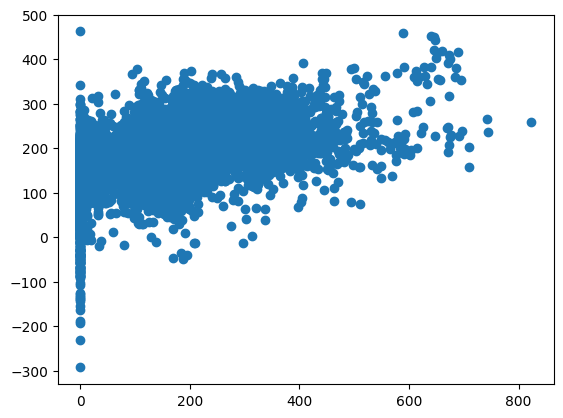

In [124]:
import matplotlib.pyplot as plt

# Fit the linear model
linear_model_pipeline.fit(new_data_train, target_train)

# Predict with the test data
lin_model_pred = linear_model_pipeline.predict(new_data_test)


# Scatterpplots
plt.scatter(
    x = target_test,
    y = lin_model_pred
)

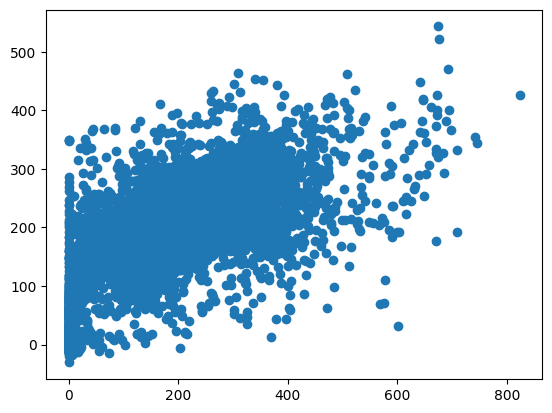

In [125]:
# Specify the training data

# data train and test
data_train = data.iloc[train_indices]
data_test = data.iloc[test_indices]


# Fit the HGBTR model
hist_grad_reg.fit(data_train, target_train)

# Predict with the test data
hgbt_model_pred = hist_grad_reg.predict(data_test)


# Scatterpplots
plt.scatter(
    x = target_test,
    y = hgbt_model_pred
)

tEST MAE ---> 67.64290201241072


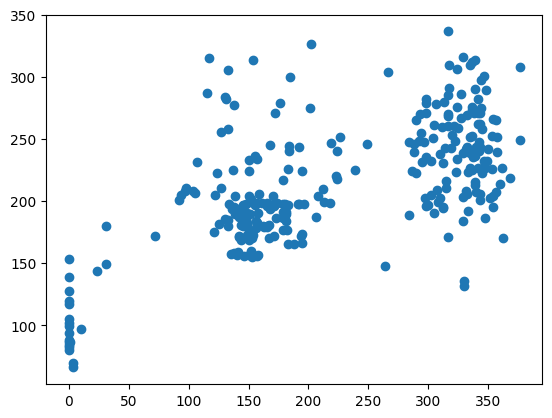

In [127]:
from sklearn.metrics import mean_absolute_error as mae

# Subset of fata from 5pm to 5:05 pm
time_slice = slice("2020-08-18 17:00:00", "2020-08-18 17:05:00")

new_data_subset = new_data_test[time_slice]

target_test_subset = target_test[time_slice]



# Predict with the test data
lin_model_sub_pred = linear_model_pipeline.predict(new_data_subset)


# Scatterpplots
plt.scatter(
    x = target_test_subset,
    y = lin_model_sub_pred
)


print(f'tEST MAE ---> {mae(target_test_subset, lin_model_sub_pred)}')

tEST MAE ---> 50.542666691401955


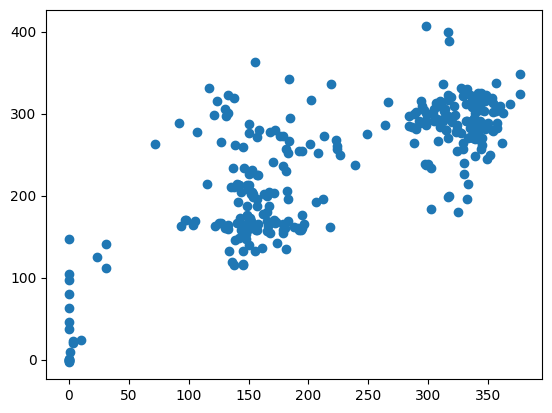

In [128]:

data_test_subset = data_test[time_slice]


# Predict with the test data
hgbt_model_sub_pred = hist_grad_reg.predict(data_test_subset)


# Scatterpplots
plt.scatter(
    x = target_test_subset,
    y = hgbt_model_sub_pred
)

print(f'tEST MAE ---> {mae(target_test_subset, hgbt_model_sub_pred)}')
